# Business Problem

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann
store managers are tasked with predicting their daily sales for up to six weeks in advance.
Store sales are influenced by many factors, including promotions, competition, school and
state holidays, seasonality, and locality. With thousands of individual managers predicting
sales based on their unique circumstances, the accuracy of results can be quite varied.

## Data Description

We have been provided data with the following data fields.
1. Id - an Id that represents a (Store, Date) duple within the test set
2. Store - a unique Id for each store
3. Sales - the turnover for any given day (this is what you are predicting)
4. Customers - the number of customers on a given day
5. Open - an indicator for whether the store was open: 0 = closed, 1 = open
6. StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are
closed on state holidays. Note that all schools are closed on public holidays and
weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
7. SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public
schools
8. StoreType - differentiates between 4 different store models: a, b, c, d
9. Assortment - describes an assortment level: a = basic, b = extra, c = extended
10. CompetitionDistance - distance in meters to the nearest competitor store
11. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the
time the nearest competitor was opened
12. Promo - indicates whether a store is running a promo on that day
13. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 =
store is not participating, 1 = store is participating
14. Promo2Since[Year/Week] - describes the year and calendar week when the store
started participating in Promo2
15. PromoInterval - describes the consecutive intervals Promo2 is started, naming the
months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round
starts in February, May, August, November of any given year for that store

Data Source : https://www.kaggle.com/c/rossmann-store-sales/data

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the Data
store_details=pd.read_csv('store.csv')
store_details.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
train_data = pd.read_csv("train.csv")
train_data.tail()

C:\Users\uzmam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
#Performing a join on the store ids
data=pd.merge(train_data,store_details,on='Store')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [7]:
data.shape

(1017209, 18)

In [9]:
data.isna().sum() #missing values

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [11]:
columns=list(data.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for i in columns:
    print(i,'----->',data[i].unique())

Store -----> [   1    2    3 ... 1113 1114 1115]
DayOfWeek -----> [5 4 3 2 1 7 6]
Sales -----> [ 5263  5020  4782 ... 20362 18841 21237]
Customers -----> [ 555  546  523 ... 3727 4022 4106]
Open -----> [1 0]
Promo -----> [1 0]
StateHoliday -----> ['0' 'a' 'b' 'c' 0]
SchoolHoliday -----> [1 0]
StoreType -----> ['c' 'a' 'd' 'b']
Assortment -----> ['a' 'c' 'b']
CompetitionOpenSinceMonth -----> [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear -----> [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2 -----> [0 1]
Promo2SinceWeek -----> [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear -----> [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval -----> [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [12]:
data['Year']=data['Date'].apply(lambda x: int(str(x)[:4]))
data['Month']=data['Date'].apply(lambda x: int(str(x)[5:7]))

[Text(0.5, 1.0, 'Year vs Sales')]

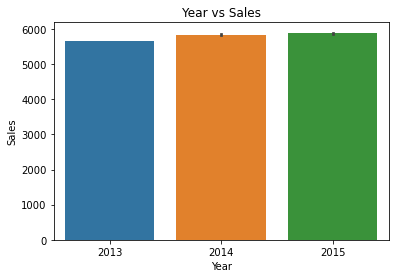

In [13]:
sns.barplot(x='Year',y='Sales',data=data).set(title='Year vs Sales')

Sales are increasing with each passing year.

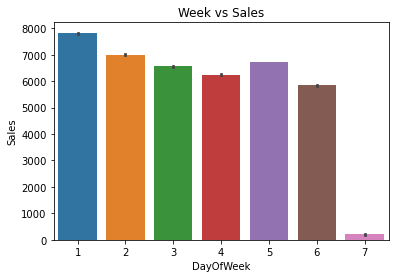

In [14]:
# Sales with respect to week
sns.barplot(x='DayOfWeek', y='Sales', data=data).set(title='Week vs Sales')
plt.show()

Sales on Monday and Friday are the highest

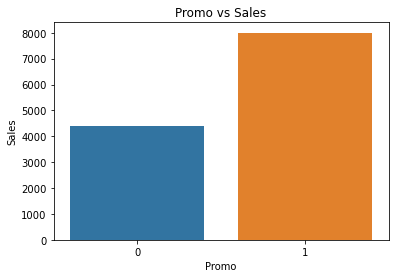

In [15]:
sns.barplot(x='Promo', y='Sales', data=data).set(title='Promo vs Sales')
plt.show()

Promo days witness higher sales

C:\Users\uzmam\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


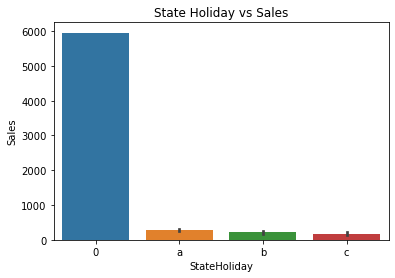

In [17]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
data["StateHoliday"].loc[data["StateHoliday"] == 0] = "0"

# Sales with respect to State Holiday
sns.barplot(x='StateHoliday', y='Sales', data=data).set(title='State Holiday vs Sales')
plt.show()

Most stores are closed on State Holidays that's why we can see that there are very less sales in a,b,c where:

a = Public Holiday

b = Easter Holiday

c = Chirstmas

0 = No Holiday, Working day

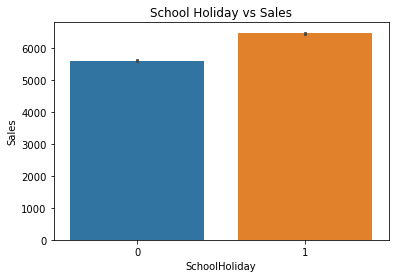

In [18]:
sns.barplot(x='SchoolHoliday', y='Sales', data=data).set(title='School Holiday vs Sales')
plt.show()

Sales are higher on school holidays

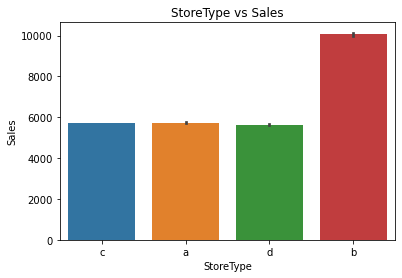

In [19]:
# Sales with respect to StoreType
sns.barplot(x='StoreType', y='Sales', data=data).set(title='StoreType vs Sales')
plt.show()

Store type b has the highest sales

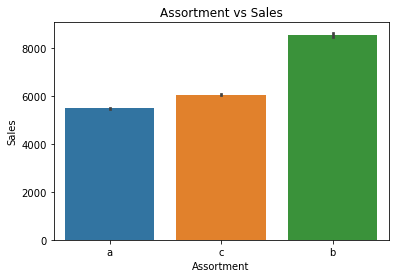

In [20]:
# Sales with respect to Assortment
sns.barplot(x='Assortment', y='Sales', data=data).set(title='Assortment vs Sales')
plt.show()

b assortment has the highest sales.

## Finding missing values and removing outliers

### Approach

1: The null values in Column Promo2SinceWeek, Promo2SinceYear, PromoInterval is due to Promo2 is 0 for those stores. So we would fill all the null values in these columns with 0.

2: Since Competition Distance for 3 stores isn't given so we could fill it with mean of the distance given for all other stores

3: CompetitionOpenSinceMonth, CompetitionOpenSinceYear can be filled using the most occuring(mode) month and year respectively.

In [22]:
store_details.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [23]:
# Filling Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
store_details.update(store_details[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].fillna(0))

In [24]:
store_details['CompetitionDistance'].fillna(store_details['CompetitionDistance'].mean(),inplace=True)

In [25]:
# Filling CompetitionOpenSinceMonth, CompetitionOpenSinceYear with most occuring month and year respectively
mode_competition_open_month = store_details['CompetitionOpenSinceMonth'].mode()[0]

mode_competition_open_year = store_details['CompetitionOpenSinceYear'].mode()[0]

store_details['CompetitionOpenSinceMonth'].fillna(mode_competition_open_month,inplace=True)
store_details['CompetitionOpenSinceYear'].fillna(mode_competition_open_year,inplace=True)

In [26]:
store_details.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [27]:
# merging the data again
combined_data = pd.merge(train_data, store_details, on='Store')
combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [28]:
combined_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<AxesSubplot:title={'center':'Sales vs CompetitionDistance'}, xlabel='CompetitionDistance', ylabel='Sales'>

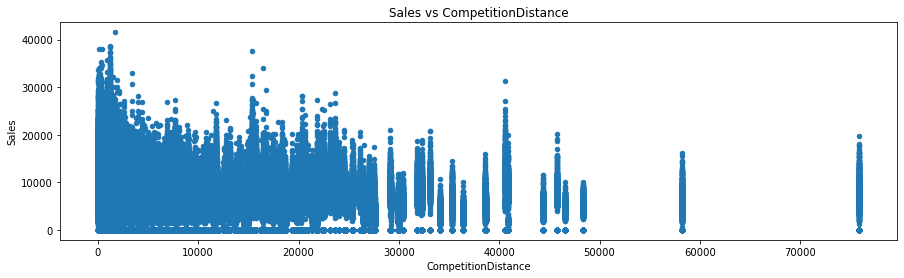

In [29]:
combined_data.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4),title="Sales vs CompetitionDistance")

# Finding Outliers

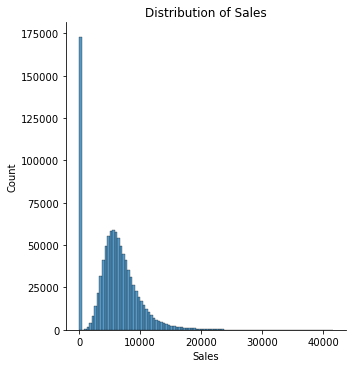

In [36]:
# checking distribution of sales 
sns.displot(combined_data, x="Sales",bins=100).set(title='Distribution of Sales')

Anything beyond 3 standard deviations from the mean can be considered as an outlier. We can consider a z-score.

In [40]:
mean_sales=combined_data['Sales'].mean()
stdev_sales=combined_data['Sales'].std()
print('Sales mean',mean_sales)
print('Sales standard deviation',stdev_sales)

Sales mean 5773.818972305593
Sales standard deviation 3849.9261752410484


Total outlier in dataset are:  9731
Maximum Sales Outlier:  41551
Minimum Sales Outlier:  17325


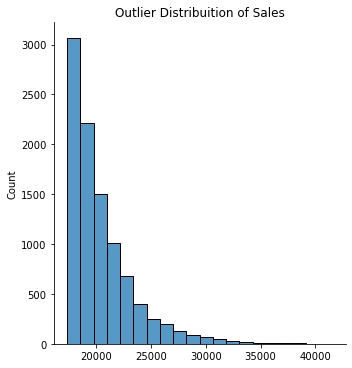

In [41]:
threshold=3
outlier=[]
for i in combined_data['Sales']:
    z=(i-mean_sales)/stdev_sales
    if z>threshold:
        outlier.append(i)
print('Total outlier in dataset are: ', len(outlier))
print("Maximum Sales Outlier: ", max(outlier))
print("Minimum Sales Outlier: ", min(outlier))

sns.displot(x=outlier,bins=20).set(title='Outlier Distribuition of Sales')

In [42]:
# Looking for outliers
sales_zero = combined_data.loc[combined_data['Sales'] == 0] 
sales_greater_than_30 = combined_data.loc[combined_data['Sales'] > 30000]

print("Length of actual dataset:", len(combined_data))
print("Length of data where sales is 0:", len(sales_zero),
      " which is", len(sales_zero)/len(combined_data)*100, "% of the whole data", )

print("Length of data which is greater than 30:", len(sales_greater_than_30),
      "which is ", len(sales_greater_than_30)/len(combined_data)*100, "% of the whole data")

Length of actual dataset: 1017209
Length of data where sales is 0: 172871  which is 16.994639253093514 % of the whole data
Length of data which is greater than 30: 153 which is  0.015041156733768577 % of the whole data


Droping sales which are greater than 30k as they are less frequent in the dataset and are probably outliers

In [43]:
combined_data.drop(combined_data.loc[combined_data['Sales'] > 30000].index,inplace=True)
combined_data.shape

(1017056, 18)